# Importacion de datos


Por eficiencia, se considero necesario almacenar el dataset en Goggle Drive. Por tanto se tiene que acceder a este en un principio.

In [2]:
!pip install gdown

# Instalacion de librerias
Instalamos las librerias que usaremos por ahora

In [3]:
import gdown
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

Accedemos al link del drive publico que contiene el zip

In [4]:
gdown.download( 'https://drive.google.com/u/2/uc?id=1e0_2YcawvoSdS-V6itdkQiqfkCn6AQws&export=download&authuser=0', quiet=False )

Downloading...
From: https://drive.google.com/u/2/uc?id=1e0_2YcawvoSdS-V6itdkQiqfkCn6AQws&export=download&authuser=0
To: /content/CredViv.zip
100%|██████████| 723M/723M [00:08<00:00, 80.5MB/s]


'CredViv.zip'

Descomprimimos el zip

In [5]:
%%bash
unzip /content/CredViv.zip

Archive:  /content/CredViv.zip
  inflating: CredViv/application_test.csv  
  inflating: CredViv/application_train.csv  
  inflating: CredViv/bureau.csv      
  inflating: CredViv/bureau_balance.csv  
  inflating: CredViv/credit_card_balance.csv  
  inflating: CredViv/HomeCredit_columns_description.csv  
  inflating: CredViv/installments_payments.csv  
  inflating: CredViv/POS_CASH_balance.csv  
  inflating: CredViv/previous_application.csv  
  inflating: CredViv/sample_submission.csv  


# Lectura de datos
Empezamos enumerando todos los archivos de datos disponibles. Hay un total de 9 archivos: 1 archivo principal de entrenamiento (con objetivo), 1 archivo principal para pruebas (sin objetivo), 1 archivo de envío de ejemplo y otros 6 archivos que contienen información adicional sobre cada préstamo.

In [6]:
application_test = pd.read_csv('/content/CredViv/application_test.csv')
bureau = pd.read_csv('/content/CredViv/bureau.csv')
bureau_balance = pd.read_csv('/content/CredViv/bureau_balance.csv')
application_train = pd.read_csv('/content/CredViv/application_train.csv')
POS_CASH_balance = pd.read_csv('/content/CredViv/POS_CASH_balance.csv')
previous_application = pd.read_csv('/content/CredViv/previous_application.csv')
installments_payments = pd.read_csv('/content/CredViv/installments_payments.csv')
credit_card_balance = pd.read_csv('/content/CredViv/credit_card_balance.csv')

Analizamos el tamaño de los datos para tener una idea. A continuacion se muestran las columnas y filas para cada uno.

In [8]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)
print('Size of application_test data', application_test.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)
Size of application_test data (48744, 121)


Organizamos esta informacion

In [9]:
data_sizes = {
    'Dataframe': ['application_train', 'POS_CASH_balance', 'bureau_balance', 'previous_application', 'installments_payments', 'credit_card_balance', 'bureau','application_test'],
    'Filas': [307511, 10001358, 27299925, 1670214, 13605401, 3840312, 1716428, 48744],
    'Columnas': [122, 8, 3, 37, 8, 23, 17, 121]
}
df_sizes = pd.DataFrame(data_sizes)
print(df_sizes)

               Dataframe     Filas  Columnas
0      application_train    307511       122
1       POS_CASH_balance  10001358         8
2         bureau_balance  27299925         3
3   previous_application   1670214        37
4  installments_payments  13605401         8
5    credit_card_balance   3840312        23
6                 bureau   1716428        17
7       application_test     48744       121


# Limpieza de datos
En el proyecto, nos limitaremos a utilizar solo los datos contenidos en application_train, pues contienen la variable TARGET, que es la que nos piden predecir en la competencia. Esto nos permitirá establecer una base que luego podremos mejorar.

Los datos de entrenamiento tienen 307511 observaciones (cada una es un préstamo separado) y 122 características (variables), incluido el TARGET (la etiqueta que queremos predecir).

In [10]:
print('Training data shape: ', application_train.shape)
application_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Veamos las variables categoricas y numericas con los respectivos valores no nulos.

In [11]:
application_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

A continuacion, calcularemos los valores faltantes para las 50 primeras columnas con mayor numero de datos nulos, esto con la finalidad de tener una primera idea de las columnas que podremos descartar por ausencia de datos.

In [12]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
valores_faltantes  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
valores_faltantes.head(50)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


Como podemos visualizar, hay columnas que poseen un gran porcentaje de datos faltantes (69,87%), es por esto que se procede a eliminar las columas con un porcemtaje de datos faltantes mayor o igual a 30%.

In [28]:
umbral = 30
columnas_suficientes = valores_faltantes[valores_faltantes['Percent'] <= umbral]
columnas_seleccionadas = columnas_suficientes.index.tolist()
application_train = application_train[columnas_seleccionadas]


In [29]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
valores_faltantes  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
valores_faltantes.head(50)

,Total,Percent
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


Con este filtrado de informacion se paso a tener 72 columas de 121 iniciales.

In [30]:
application_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EXT_SOURCE_3                 246546 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_HOUR   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_DAY    265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_MON    265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT    265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_YEAR   265992 non-null  float64
 7   NAME_TYPE_SUITE              306219 non-null  object 
 8   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 10  OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 11  OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 12  EXT_SOURCE_2                 306851 non-null  float64
 13 

In [26]:
pd.set_option('display.max_rows', None)
print(application_train.isnull().sum())

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
NAME_TYPE_SUITE                 1292
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
HOUR_APPR_PROCESS_START            0
FLAG_EMAIL                         0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
FLAG_CONT_MOBILE                   0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
R

Ahora, se analiza la importancia de las columnas existentes, con la finalidad de filtrar o eliminar las que se consideren irrelevantes para el ejercicio

In [37]:
columna_especifica = application_train['DAYS_LAST_PHONE_CHANGE'] #¿Cuántos días antes de la aplicación cambió el teléfono del cliente?
print(columna_especifica.head(10))

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
5   -2536.0
6   -1562.0
7   -1070.0
8       0.0
9   -1673.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


En el ejemplo anterior se determina que el cambio de telefono dias antes de la aplicacion no es relevante para el ejercicio, ademas se cuenta con datos negativos que no son logicos.

Analizando las columnas existente, se halla las columas 'FLAG_DOCUMENT' (¿Proporcionó el cliente el documento?), al no interpretar estos datos, tambien se consideran irrelevantes para el ejercicio.



In [42]:
columna_especifica = application_train['FLAG_DOCUMENT_10']
print(columna_especifica.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: FLAG_DOCUMENT_10, dtype: int64


In [45]:
application_train.drop(['DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

In [46]:
columnas_a_eliminar = [col for col in application_train.columns if col.startswith('FLAG_DOCUMENT')]
application_train.drop(columnas_a_eliminar, axis=1, inplace=True)

Obteniendo asi 51 columnas.

In [47]:
application_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EXT_SOURCE_3                 246546 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_HOUR   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_DAY    265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_MON    265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT    265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_YEAR   265992 non-null  float64
 7   NAME_TYPE_SUITE              306219 non-null  object 
 8   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 10  OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 11  OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 12  EXT_SOURCE_2                 306851 non-null  float64
 13 

Ahora se va a determinar que columnas categoricas tienen un solo subnivel.

In [48]:
columnas_categoricas = application_train.select_dtypes(include=['object']).columns.tolist()

for columna in columnas_categoricas:
    num_subniveles = application_train[columna].nunique()
    print(f'Columna "{columna}" tiene {num_subniveles} subniveles únicos.')


Columna "NAME_TYPE_SUITE" tiene 7 subniveles únicos.
Columna "NAME_CONTRACT_TYPE" tiene 2 subniveles únicos.
Columna "CODE_GENDER" tiene 3 subniveles únicos.
Columna "FLAG_OWN_CAR" tiene 2 subniveles únicos.
Columna "FLAG_OWN_REALTY" tiene 2 subniveles únicos.
Columna "WEEKDAY_APPR_PROCESS_START" tiene 7 subniveles únicos.
Columna "NAME_INCOME_TYPE" tiene 8 subniveles únicos.
Columna "ORGANIZATION_TYPE" tiene 58 subniveles únicos.
Columna "NAME_HOUSING_TYPE" tiene 6 subniveles únicos.
Columna "NAME_FAMILY_STATUS" tiene 6 subniveles únicos.
Columna "NAME_EDUCATION_TYPE" tiene 5 subniveles únicos.


Podemos observar que ninguna tiene un solo subnivel, por la cual no se la puede descartar

Hacemos lo mismo para los datos numericos, donde tampoco podemos descartar alguno

In [50]:
columnas_numericas = application_train.select_dtypes(include='number')

std_por_columna = columnas_numericas.std()
columnas_con_desviacion_cero = std_por_columna[std_por_columna == 0].index.tolist()

print("Columnas con desviación estándar igual a cero:")
for columna in columnas_con_desviacion_cero:
    print(columna)

Columnas con desviación estándar igual a cero:


Aplicamos un codigo que nos permita filtrar las filas repetidas.

In [51]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {application_train.shape}')
application_train.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {application_train.shape}')

Tamaño del set antes de eliminar las filas repetidas: (307511, 51)
Tamaño del set después de eliminar las filas repetidas: (307511, 51)


Como podemos observar, conservamos el mismo numero de filas, pues no se repite ninguna.

A continuacion, vamos a analizar los outliers, a partir de un botplox que nos permitira visualizar y analizar estos valores extremos numericos

In [56]:
data_frame_numeric = application_train.select_dtypes(include=['number'])
columnas_numericas = data_frame_numeric.columns
print(columnas_numericas)

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'HOUR_APPR_PROCESS_START', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'FLAG_CONT_MOBILE', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'TARGET',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'SK_ID_CU

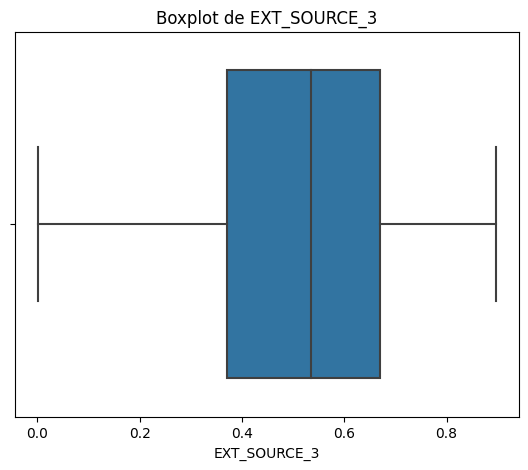

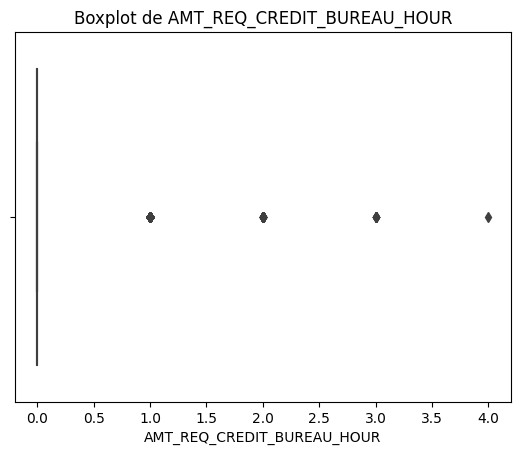

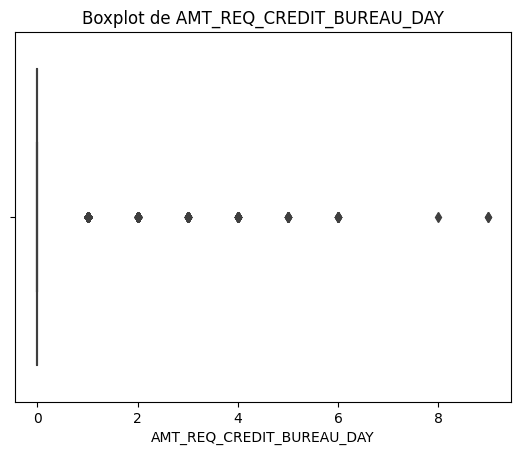

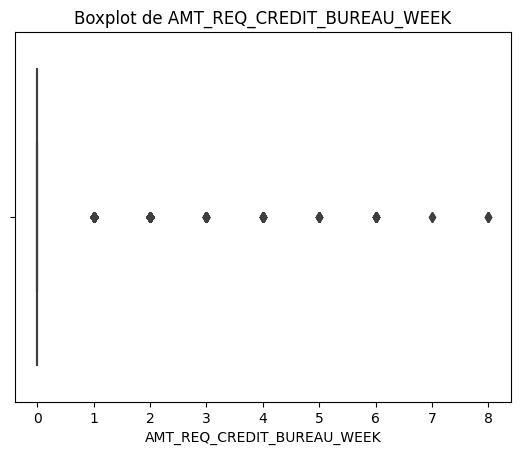

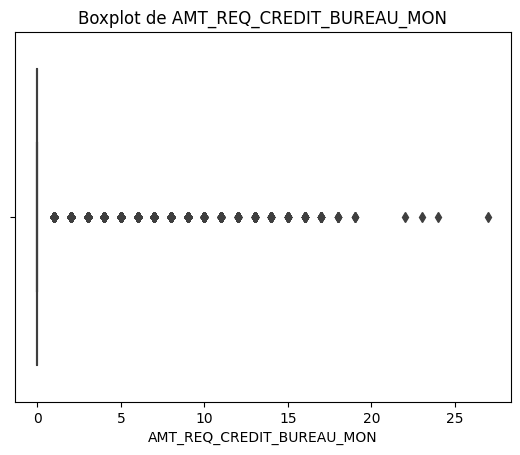

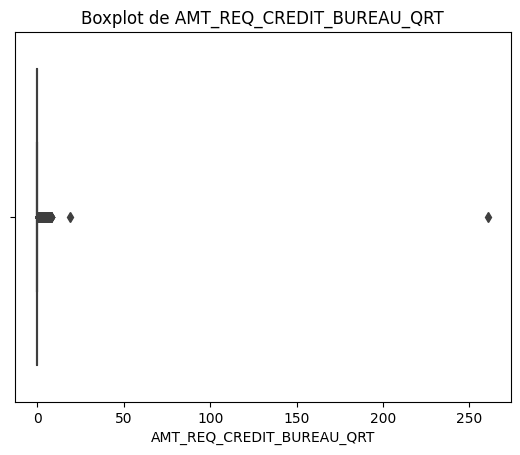

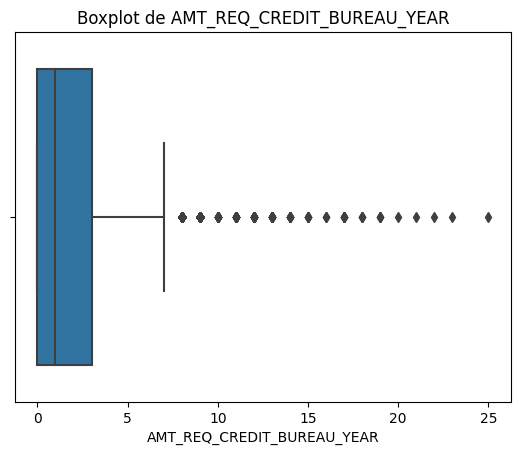

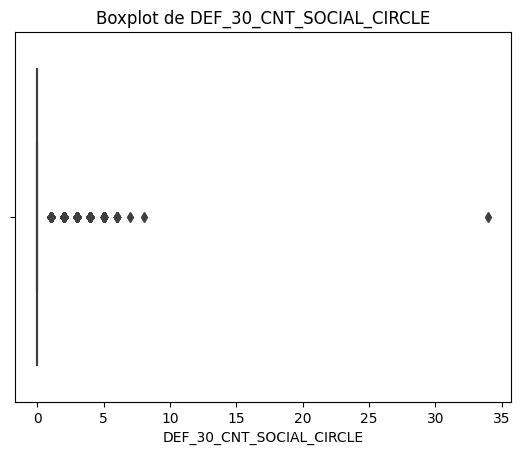

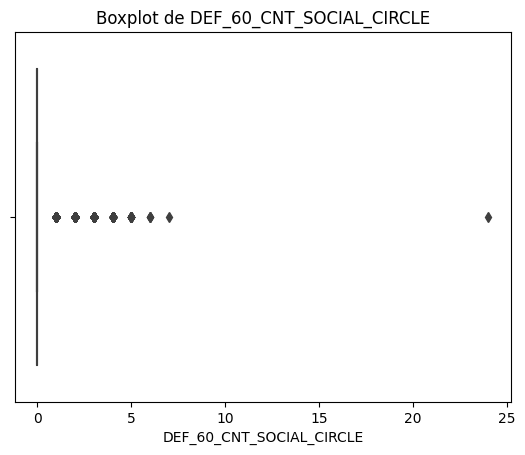

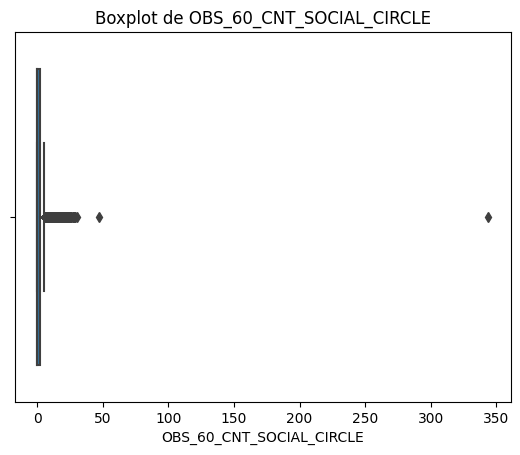

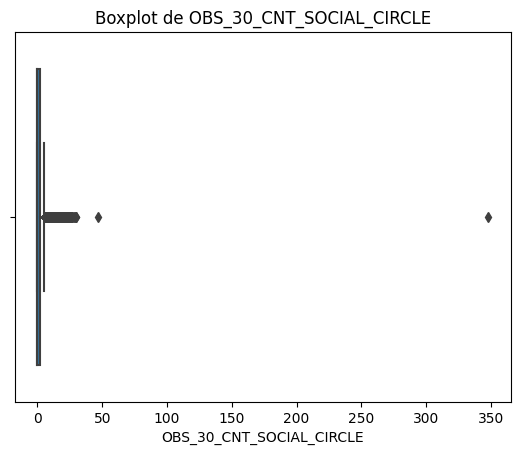

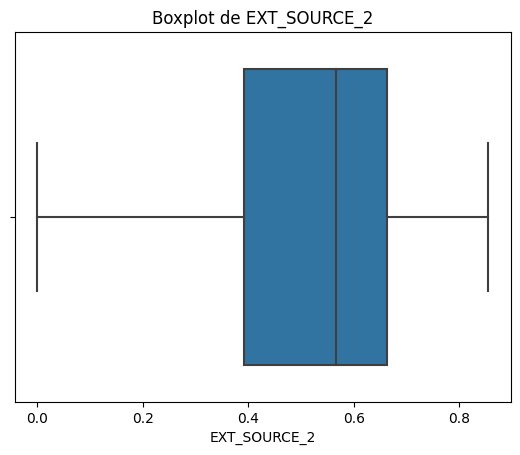

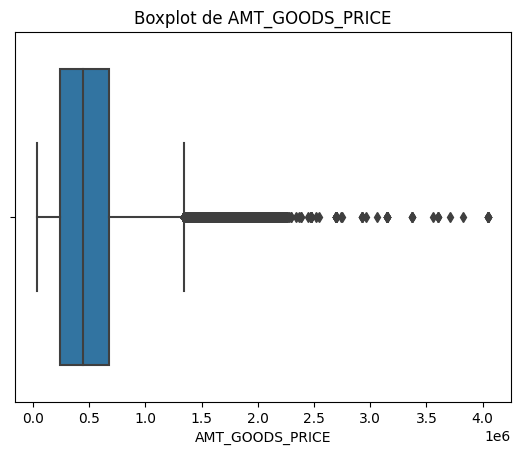

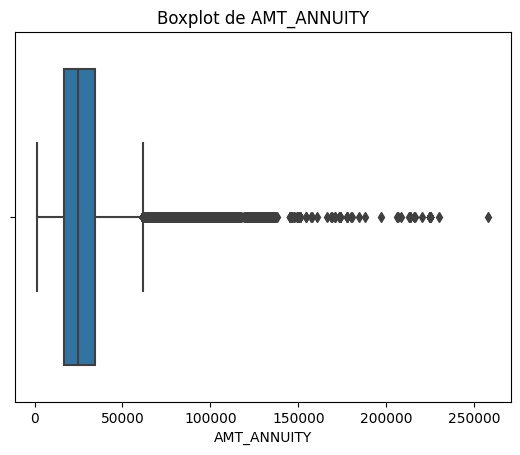

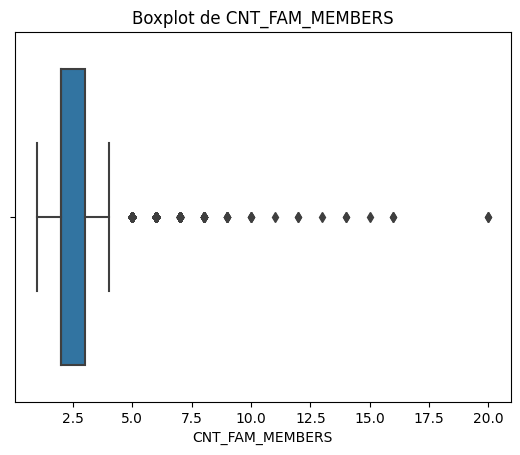

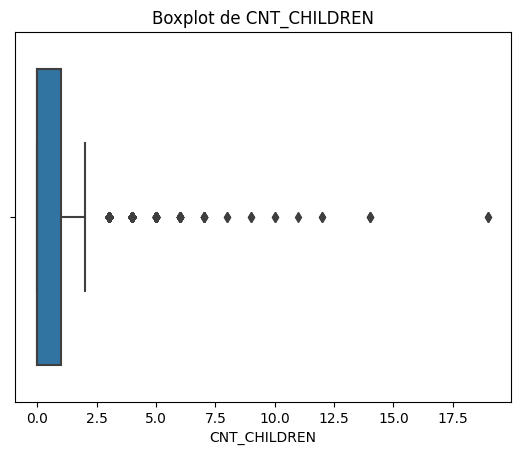

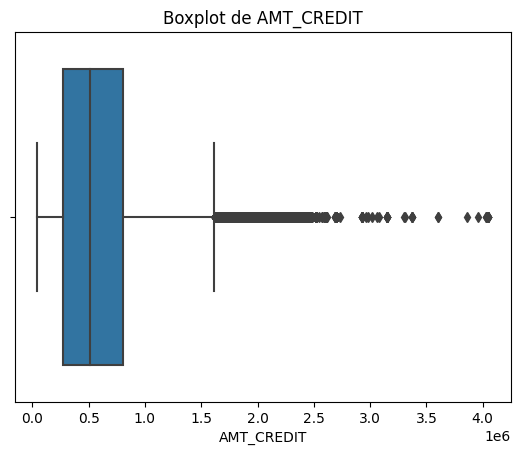

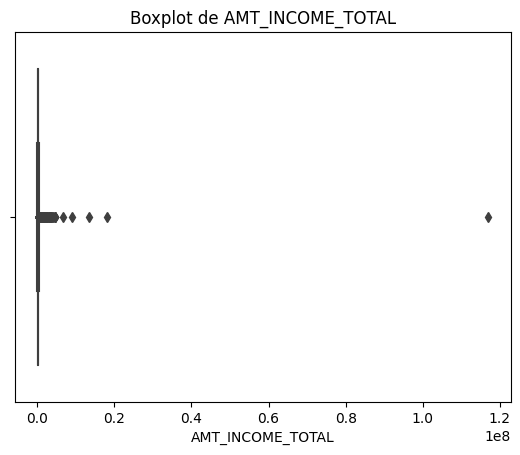

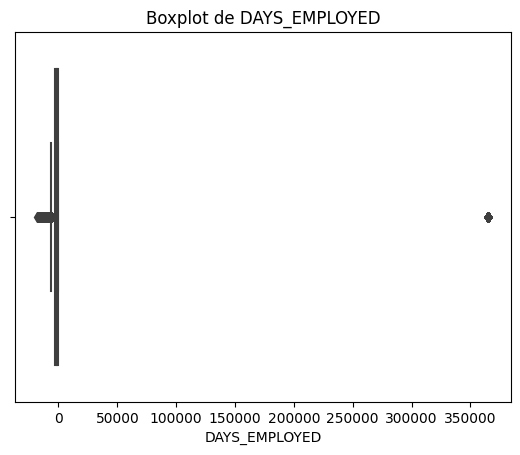

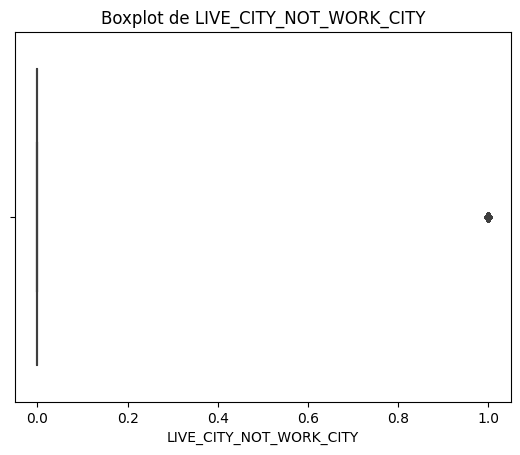

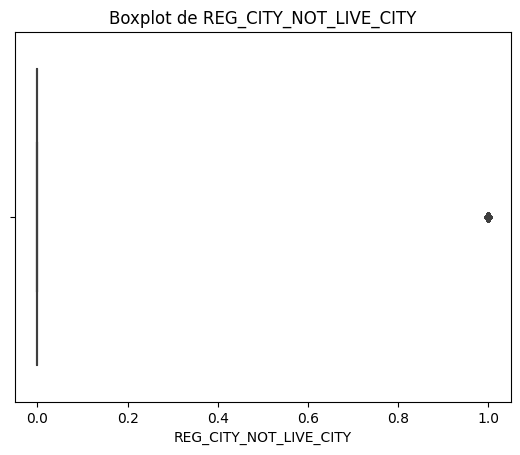

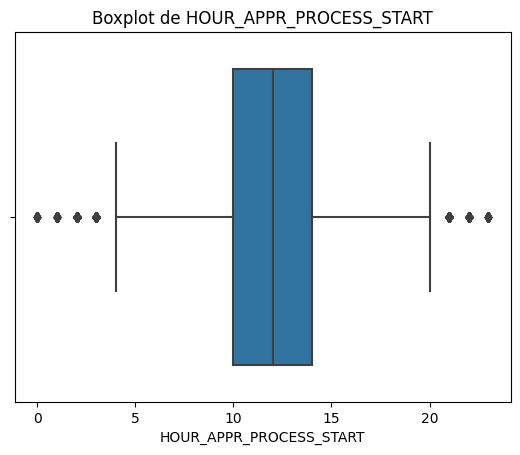

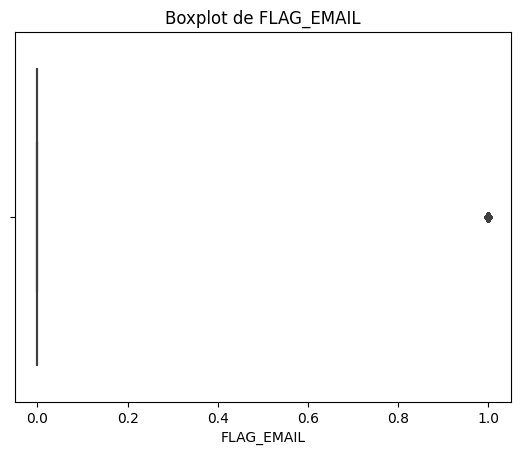

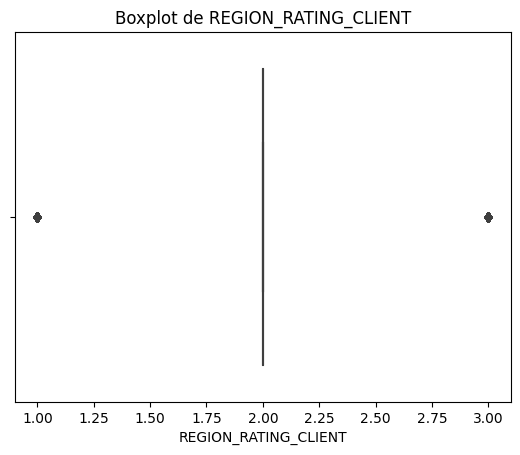

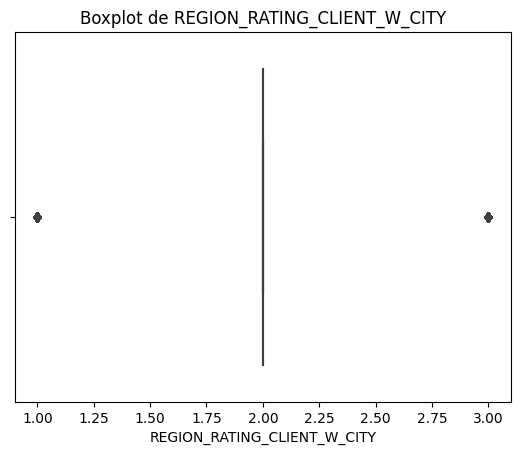

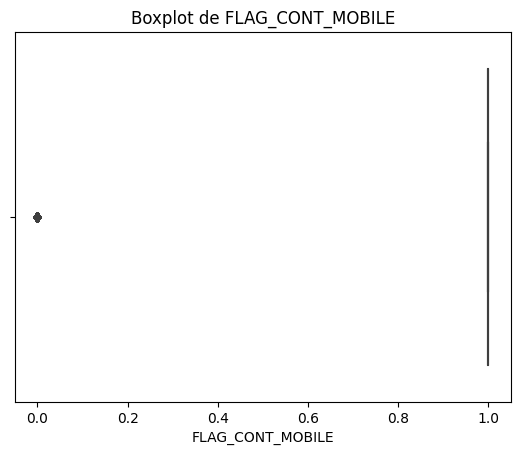

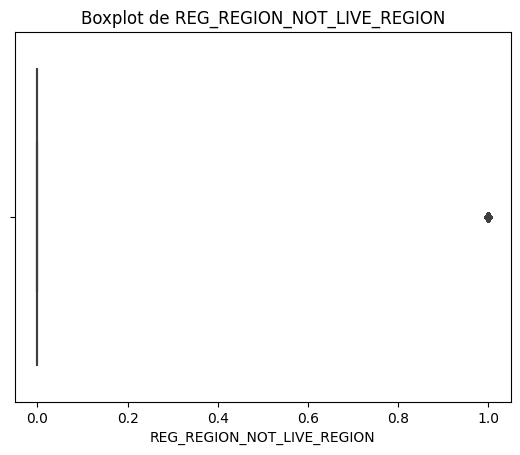

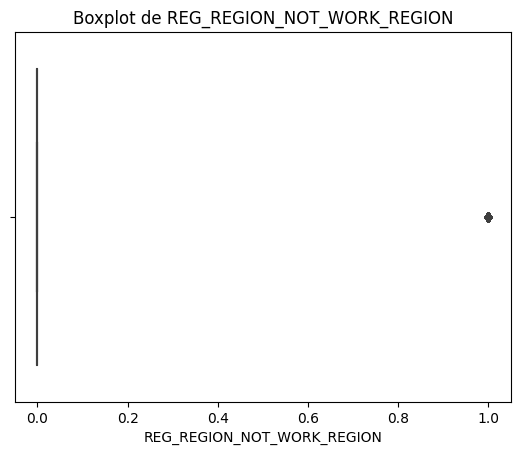

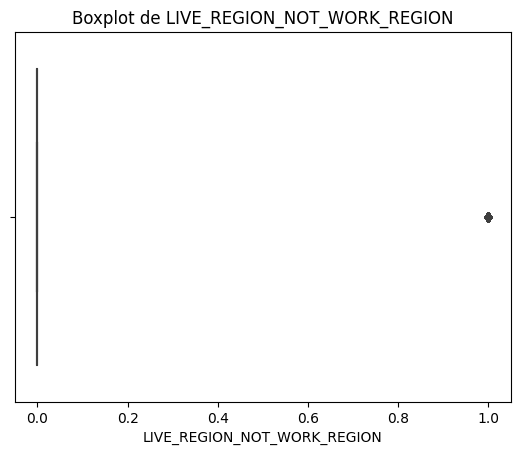

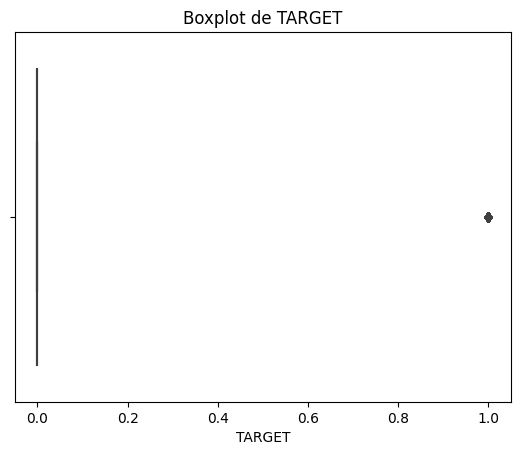

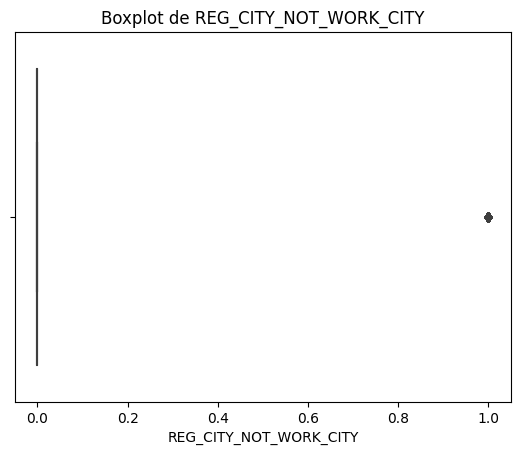

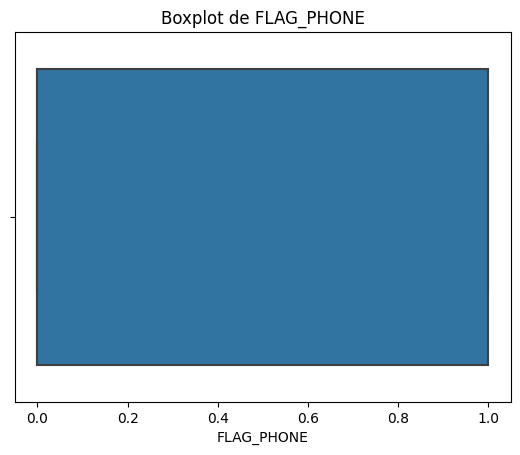

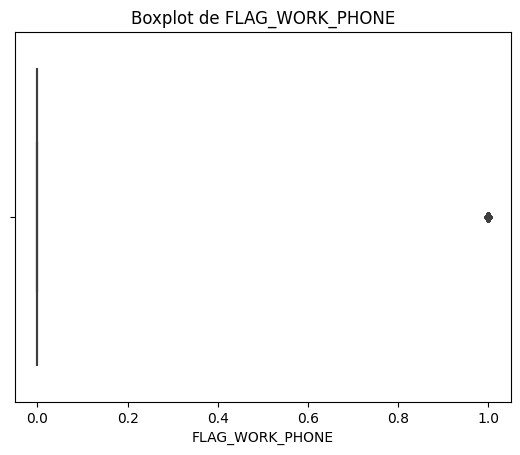

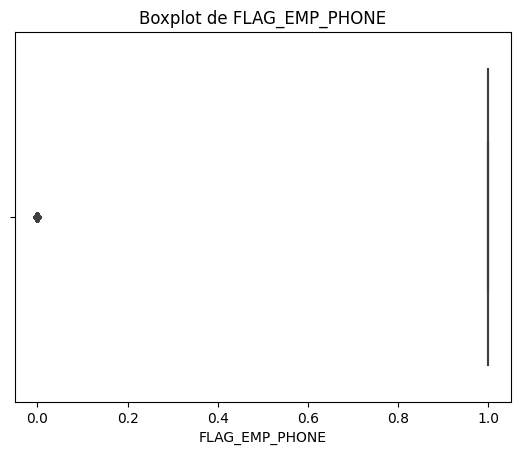

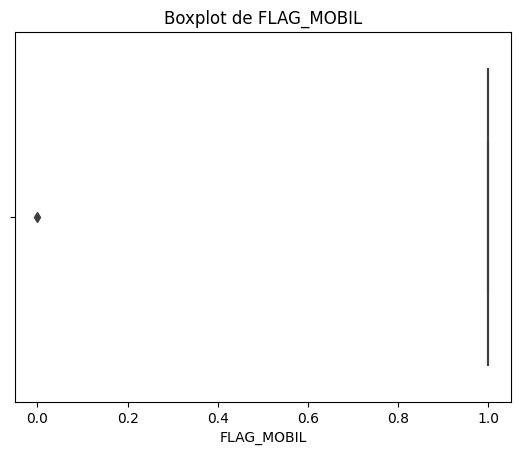

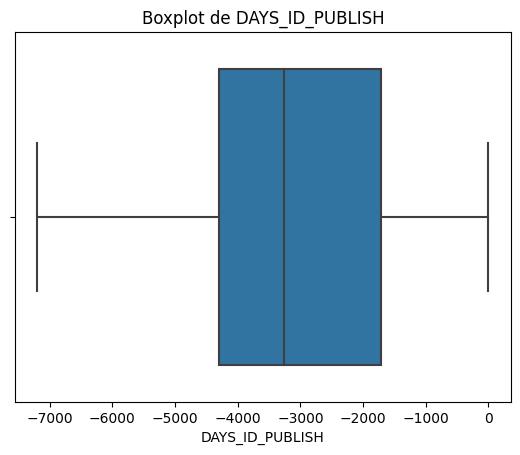

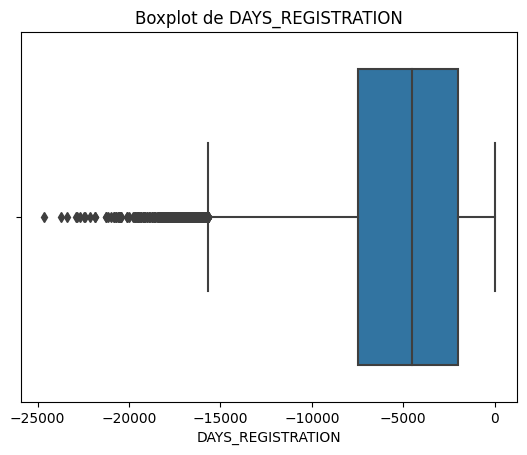

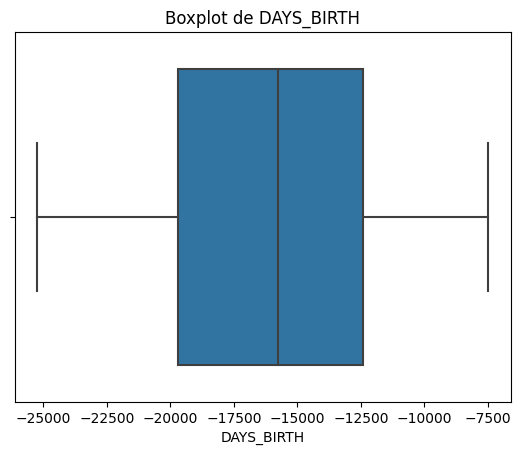

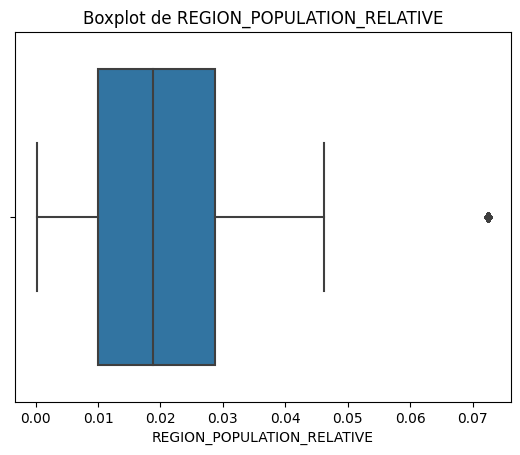

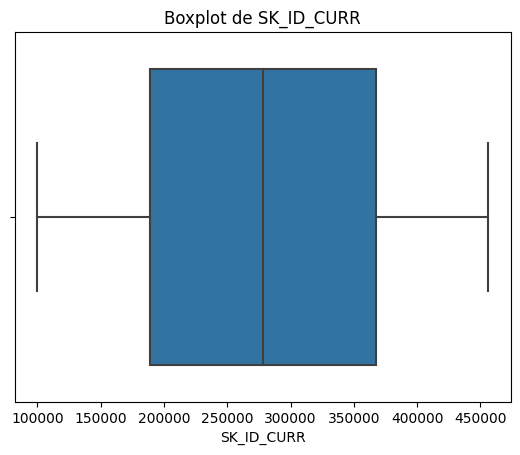

In [57]:
datos_ordenados = ['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'HOUR_APPR_PROCESS_START', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'FLAG_CONT_MOBILE', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'TARGET',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'SK_ID_CURR']

plt.figure(figsize=(6.5, 5))

for col in datos_ordenados:
    sns.boxplot(x=application_train[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

Esto se lo hace con la finalidad de analizar las columas evaluadas y determinar si los outliers hallados pueden ser eliminados